In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline   
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder


In [2]:
data_df=pd.read_csv('Mall_Customers.csv')

In [3]:
print(data_df.shape)
print(data_df.info())

(200, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [4]:
data_df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
# drop Customer id 
data_df = data_df.drop('CustomerID', axis=1)
data_df.head(2)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81


c:\Users\siyam\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\siyam\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\siyam\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

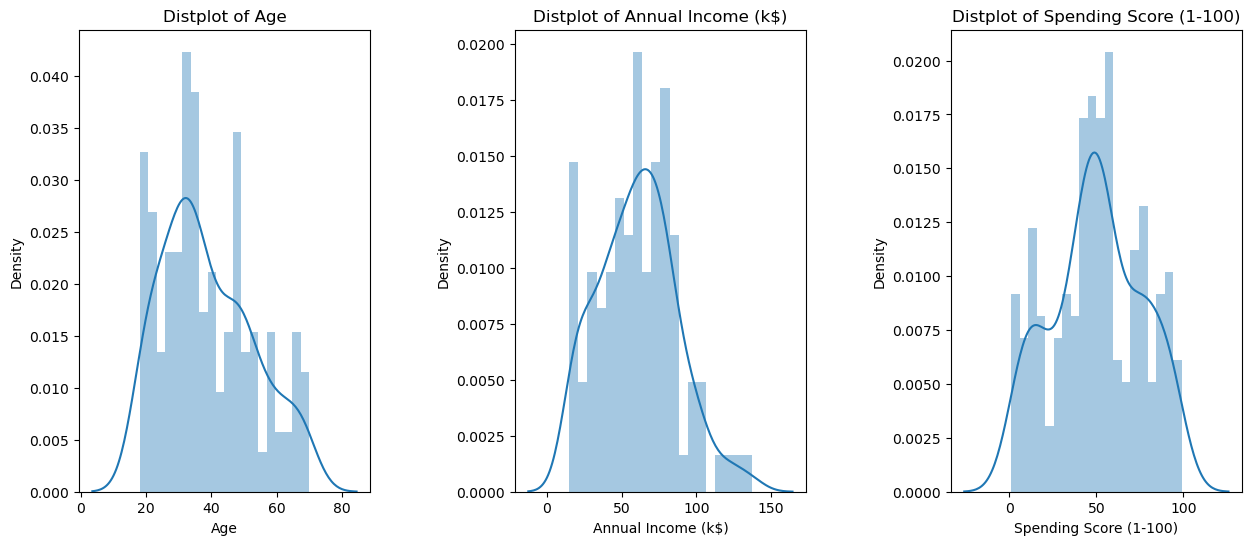

In [6]:
#EDA - Exploratory Data Analysis

plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(data_df[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()

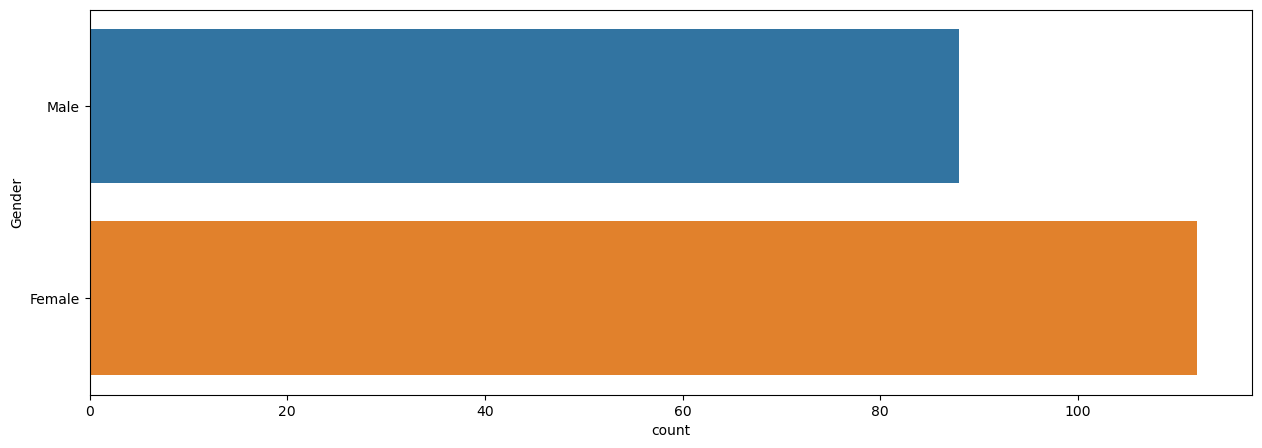

In [7]:
plt.figure(1 , figsize = (15 , 5))
sns.countplot(y = 'Gender' , data = data_df)
plt.show()

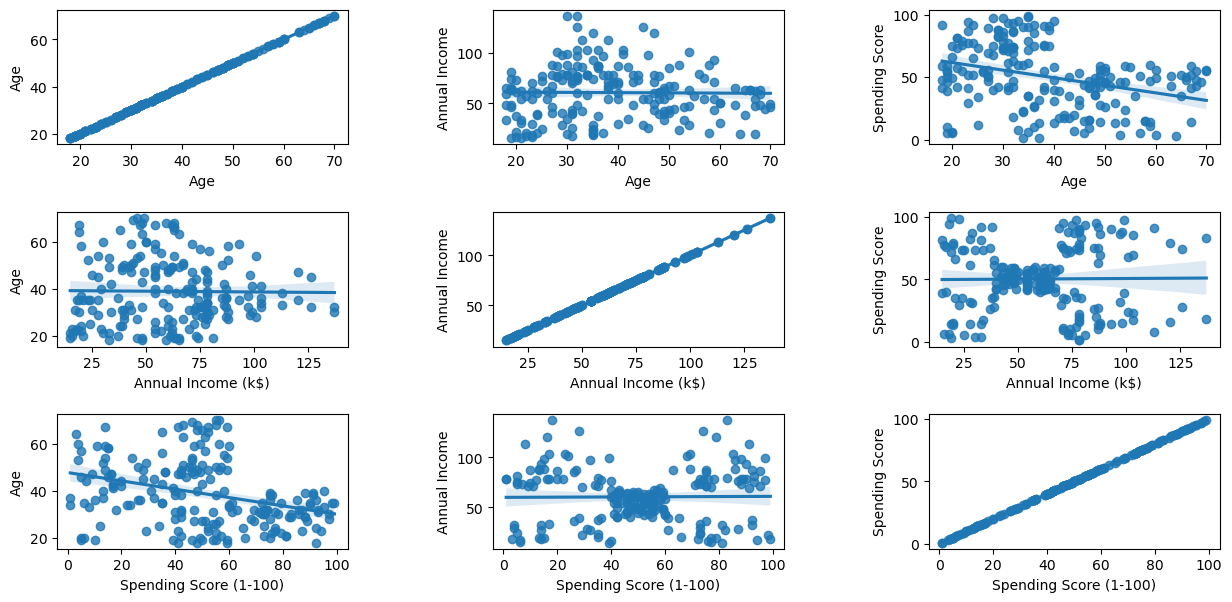

In [8]:
#20 percent of our customers are female

plt.figure(1 , figsize = (15 , 7))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    for y in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
        n += 1
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
        sns.regplot(x = x , y = y , data = data_df)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
plt.show()

In [9]:
"""Age Vs Annual income
=> 30-60 years old customers have relatively higher annual income

Age Vs spending score
=> Under 40 years old customers have score over 60

Annula income vs Spending score
=> We can see 5 blobs, there is no relation between the customers having annual income in the range of 20-40k and 80-140k but there is relation between customers who have annual income in the range of 40-60k. """




#Train test split


train_X, test_X = train_test_split(data_df, test_size=0.2, random_state=42)

print(len(train_X), "train +", len(test_X), "test")

160 train + 40 test


In [10]:
# lets take copy of the data 
df = train_X.copy()


In [64]:
"""Prepare the data
The following stages are:

Preprocessing.LabelEncoder() -normalize labels so they contain values between 0 and 1
StandardScaler - scaling to unit variance (ie Normalizing the data)
Principal Component analysis(PCA)- is an unsupervised statistical technique that is used for dimensionality reduction.
Feature selection."""

'Prepare the data\nThe following stages are:\n\nPreprocessing.LabelEncoder() -normalize labels so they contain values between 0 and 1\nStandardScaler - scaling to unit variance (ie Normalizing the data)\nPrincipal Component analysis(PCA)- is an unsupervised statistical technique that is used for dimensionality reduction.\nFeature selection.'

In [11]:
# Let's fit and transform the Gender attribute into numerical data
le = LabelEncoder()
le.fit(df.Gender)
df.loc[:,'Gender'] = le.transform(df.Gender)
df.head(3)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
79,0,49,54,42
197,1,32,126,74
38,0,36,37,26


In [12]:
# Create scaler: scaler
scaler = StandardScaler()
scaler.fit(df)
# transform
data_scaled = scaler.transform(df)
data_scaled[0]

array([-0.87077078,  0.73027906, -0.24190423, -0.37113766])

In [13]:
pca = PCA()

# fit PCA
pca.fit(data_scaled)
# PCA features
features = range(pca.n_components_)
# PCA transformed data
data_pca = pca.transform(data_scaled)
pca.explained_variance_ratio_

array([0.33107688, 0.26720006, 0.22991261, 0.17181045])

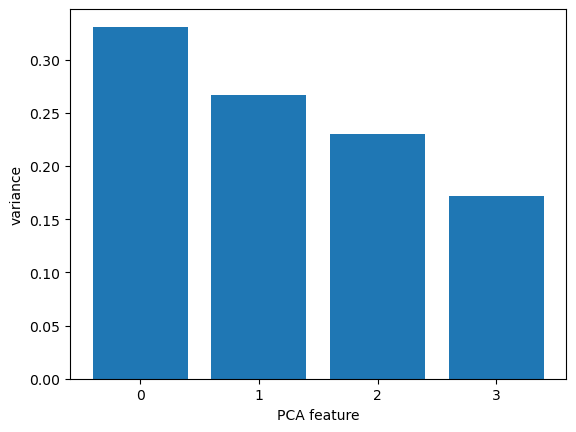

In [14]:
plt.bar(features, pca.explained_variance_ratio_)
plt.xticks(features)
plt.ylabel('variance')
plt.xlabel('PCA feature')
plt.show()

In [15]:
"""> As we can see 33.1% of the data corresponds to the first axis 
and 26.8% corresponds to the seconds we will work 
with 2 insintric dimensions (number of PCA features needed to approximate the dataset)"""



# Principal component analysis (PCA) and singular value decomposition (SVD) 
# PCA and SVD are closely related approaches and can be both applied to decompose any rectangular matrices.
pca2 = PCA(n_components=2, svd_solver='full')
# fit PCA
pca2.fit(data_scaled)

# PCA transformed data
data_pca2 = pca2.transform(data_scaled)
print(data_pca2.shape)






(160, 2)


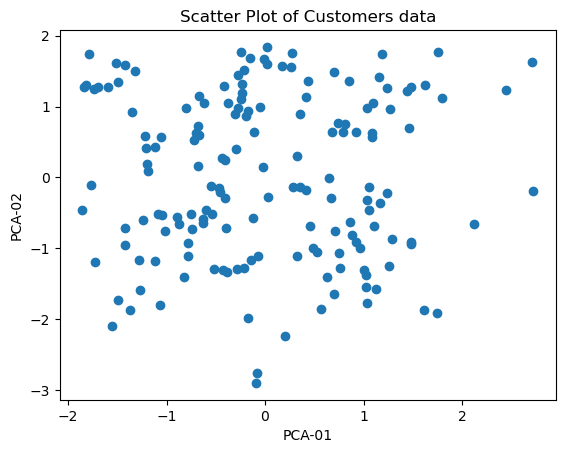

In [16]:
xs = data_pca2[:,0]
ys = data_pca2[:,1]
plt.scatter(ys, xs)

plt.grid(False)
plt.title('Scatter Plot of Customers data')
plt.xlabel('PCA-01')
plt.ylabel('PCA-02')

plt.show()

In [40]:
!pip install --upgrade scikit-learn

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/fb/d8/8d603bdd26601f4b07e2363032b8565ab82eb857f93d86d0f7956fcf4523/scikit_learn-1.6.1-cp39-cp39-win_amd64.whl.metadata
  Obtaining dependency information for joblib>=1.2.0 from https://files.pythonhosted.org/packages/91/29/df4b9b42f2be0b623cbd5e2140cafcaa2bef0759a00b7b70104dcfe2fb51/joblib-1.4.2-py3-none-any.whl.metadata
  Obtaining dependency information for threadpoolctl>=3.1.0 from https://files.pythonhosted.org/packages/4b/2c/ffbf7a134b9ab11a67b0cf0726453cedd9c5043a4fe7a35d1cefa9a1bcfb/threadpoolctl-3.5.0-py3-none-any.whl.metadata
   ---------------------------------------- 11.2/11.2 MB 2.9 MB/s eta 0:00:00
   ---------------------------------------- 301.8/301.8 kB 1.3 MB/s eta 0:00:00
  Attempting uninstall: threadpoolctl
    Found existing installation: threadpoolctl 2.2.0
    Uninstalling threadpoolctl-2.2.0:
      Successfully uninstalled threadpoolctl-2.2.0
  Attempting uninstall: 


[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [17]:
#  finding elbow value using the elbow method for different number of clusters.
X = data_pca2
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++',random_state= 42 ) )
    algorithm.fit(X)
    inertia.append(algorithm.inertia_)

c:\Users\siyam\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\siyam\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\siyam\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\siyam\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

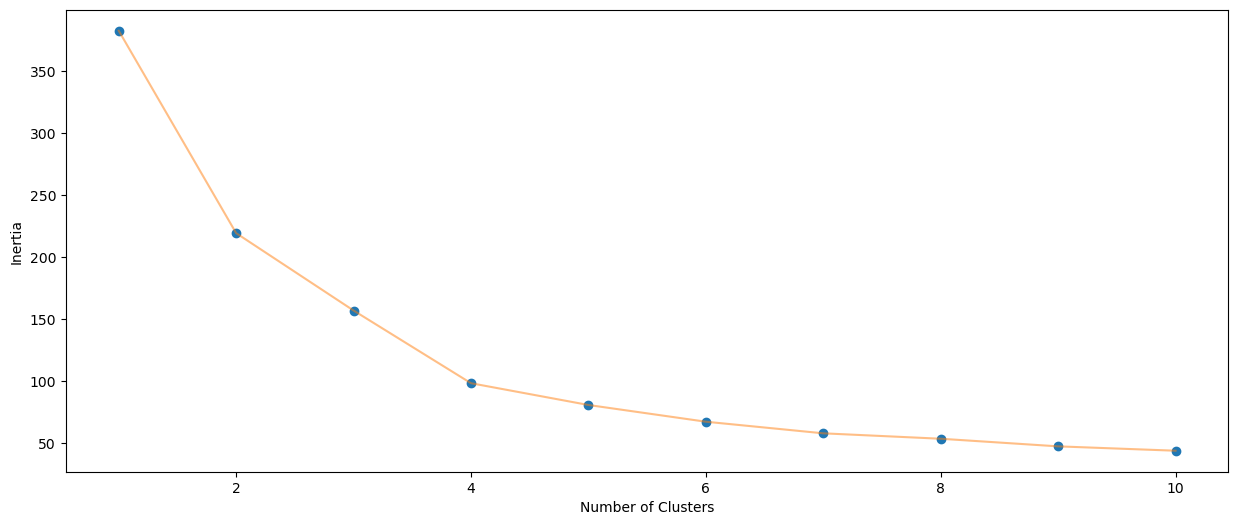

In [18]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [19]:
# KMeans model
# 5 clusters to start with
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)

In [20]:
# Build pipeline
pipeline = make_pipeline(scaler, pca2, kmeans)
# fit the model to the scaled dataset
model_fit = pipeline.fit(df)
model_fit

c:\Users\siyam\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=2, svd_solver='full')),
                ('kmeans', KMeans(n_clusters=5, random_state=0))])

In [21]:
#Assign labels
# return a label for each data point based on their cluster
labels = model_fit.predict(df)
train_X['Clusters'] = labels

In [22]:
# Number of data points for each feature in each cluster
train_X.groupby('Clusters').count()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
Clusters,,,,
0,29,29,29,29
1,25,25,25,25
2,20,20,20,20
3,40,40,40,40
4,46,46,46,46


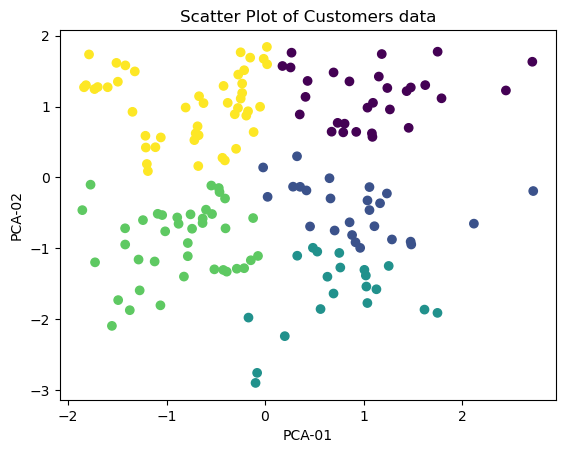

In [23]:
 #Scatter plot visuals with labels

xs = data_pca2[:,0]
ys = data_pca2[:,1]
#zs = train_X.iloc[:,2]
plt.scatter(ys, xs,c=labels)
#plt.scatter(ys, zs, c=labels)

plt.grid(False)
plt.title('Scatter Plot of Customers data')
plt.xlabel('PCA-01')
plt.ylabel('PCA-02')

plt.show()

In [24]:
#VALIDATE WITH TEST DATA

# predict the labels
le.fit(test_X.Gender)

#update df2 with transformed values of gender
test_X.loc[:,'Gender'] = le.transform(test_X.Gender)

labels_test = model_fit.predict(test_X)
test_X['Clusters'] = labels_test

labels_test

array([0, 4, 2, 1, 2, 4, 4, 1, 2, 4, 3, 1, 4, 4, 2, 0, 3, 3, 2, 0, 4, 3,
       3, 3, 0, 2, 4, 3, 4, 4, 4, 2, 1, 0, 1, 1, 4, 0, 2, 3])

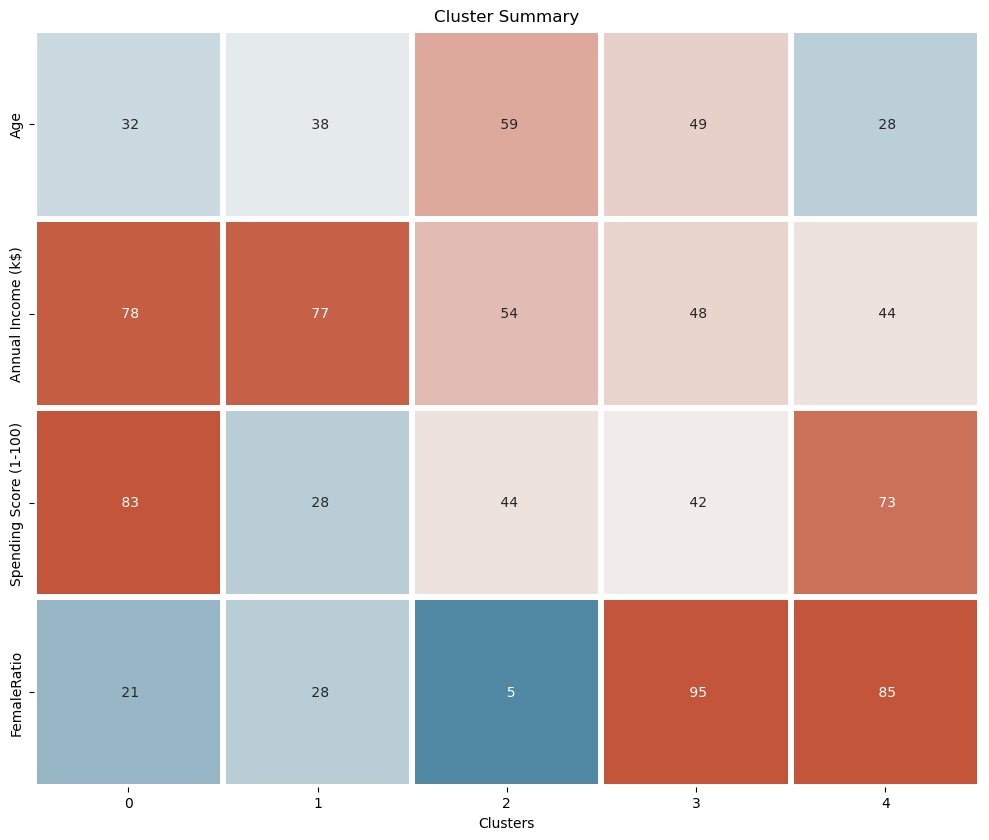

In [25]:
cluster_heatmap_df = train_X.groupby(['Clusters'])[['Age','Annual Income (k$)','Spending Score (1-100)']].median()
heatcmap = sns.diverging_palette(230, 20, as_cmap=True)
cluster_heatmap_df['FemaleRatio'] = train_X[train_X['Gender'] == 'Female'].groupby(['Clusters']).count()['Gender'] / train_X.groupby(['Clusters']).count()['Gender'] * 100

fig, ax = plt.subplots(1, 1, figsize=(10, 10))

sns.heatmap(cluster_heatmap_df.T, 
    square=True,
    linewidth=3,
    vmax=80, 
    vmin=1,
    cmap=heatcmap,
    cbar=False, 
    annot=True,
    fmt='3.0f',
    ax=ax,
);

ax.set_title('Cluster Summary');
plt.tight_layout()


In [ ]:
"""

For the given dataset, 
we have segmented the customers into 5 clusters using Kmeans algorithm. 
Each cluster is mix of defined variables such as - gender, age, spending score and annual income.



"""